In [1]:
# %load_ext jupyternotify

In [2]:
# %%notify
# import time
# time.sleep(5)

In [3]:
# %load_ext jupyternotify

In [4]:
# %%notify -m "The cell has finished running"
# import time
# time.sleep(10)
# print('Finished!')

In [5]:
# import jupyternotify
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

In [6]:
# %%notify
# import time
# time.sleep(5)

<br><br>

---

# Verbage to Add to markdown

---

1. Grab four or five single dimensional KPIs, and crank out AD for them via DBSCAN
1. Exploratory is part of this !  
1. Will in fact see some oddness
1. If you see the same value for more than six hours at a time, something is odd, find the ranges ! 

<br><br>

---

# DBSCAN Examinination

---

1. Grab four or five single dimensional KPIs, and crank out AD for them via DBSCAN

<br><br>

<br><br>

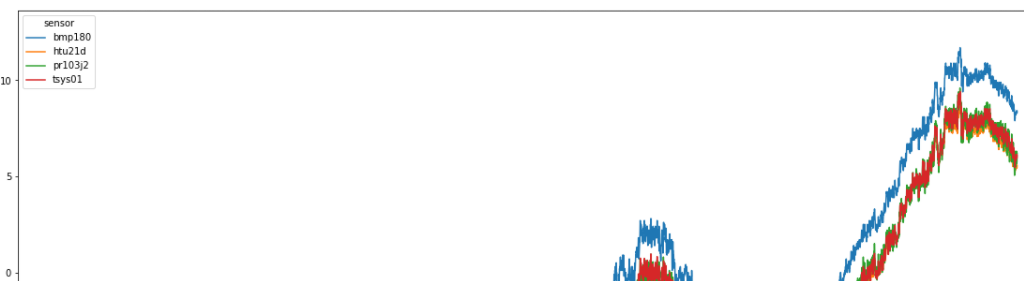

dont forget to filter the 'id' data out ! 

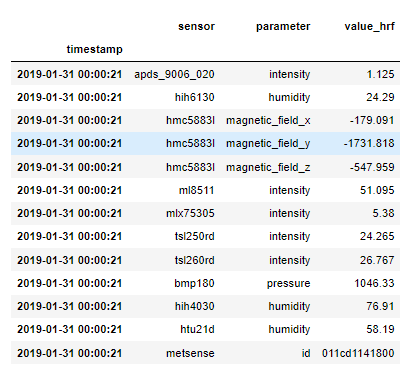

<br><br>

# A. Quick High Level Demo of DBSCAN (from scikit-learn site)

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


C:\Users\tbresee\AppData\Roaming\Python\Python38\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


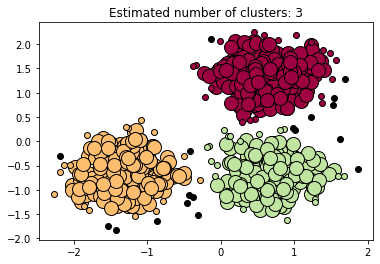

In [7]:

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# %load_ext jupyternotify

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_
# print('labels:', labels)  0/1/2 

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print('Estimated Number of Clusters:', n_clusters_)

n_noise_ = list(labels).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


<br><br>

<br><br>

# Unsupervised Machine Learning - DBSCAN

* helpful reference - https://www.kaggle.com/medaziztousli/anomaly-detection-models-for-iot-data/notebook


In [8]:

#-------------------------------------------------
import pickle
import multiprocessing as mp

%load_ext jupyternotify

# worth doing ? ? ? 
# import modin.pandas as pd
# https://github.com/modin-project/modin


import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from tqdm.auto import tqdm
tqdm.pandas()
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# a.d. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
#-------------------------------------------------


<IPython.core.display.Javascript object>

> should turn all this into a python function

In [11]:
%cd D:\ABSOLUTELY_CRITICAL_BACKUP_FOLDER_LOCATION\

D:\ABSOLUTELY_CRITICAL_BACKUP_FOLDER_LOCATION


In [12]:

file = 'single_sensor_exported_dask_dataframe_final.csv'  # over 7GB size...

# this is a huge huge file, you should save this as a pkl right ? 

df = pd.read_csv(file, 
                parse_dates=True,
                index_col='timestamp')


In [14]:
# pd.read_csv?

In [17]:

df.columns


Index(['Unnamed: 0', 'node_id', 'subsystem', 'sensor', 'parameter',
       'value_raw', 'value_hrf'],
      dtype='object')

In [18]:

df.dtypes


Unnamed: 0     int64
node_id       object
subsystem     object
sensor        object
parameter     object
value_raw     object
value_hrf     object
dtype: object

In [19]:

df.index # has correct dtype 


DatetimeIndex(['2018-03-06 22:14:56', '2018-03-06 22:14:56',
               '2018-03-06 22:14:56', '2018-03-06 22:14:56',
               '2018-03-06 22:14:56', '2018-03-06 22:14:56',
               '2018-03-06 22:14:56', '2018-03-06 22:14:56',
               '2018-03-06 22:14:56', '2018-03-06 22:14:56',
               ...
               '2021-03-22 05:18:42', '2021-03-22 05:18:42',
               '2021-03-22 05:18:42', '2021-03-22 05:18:42',
               '2021-03-22 05:18:42', '2021-03-22 05:18:42',
               '2021-03-22 05:18:42', '2021-03-22 05:18:42',
               '2021-03-22 05:18:42', '2021-03-22 05:18:42'],
              dtype='datetime64[ns]', name='timestamp', length=86169288, freq=None)

In [ ]:

# note:  in some cases, its great to have extremely granular, interactive plotting
#        but in other cases, its detrimental
#        thus, I will choose one or the other depending on the use case 
#
# note:  this is an extremely large dataset, that can be filtered for specific timeslots when necessary



**- - - Examine - - -**


In [20]:

df.head(20)


,Unnamed: 0,node_id,subsystem,sensor,parameter,value_raw,value_hrf
timestamp,,,,,,,
2018-03-06 22:14:56,721974,001e0610ee36,lightsense,apds_9006_020,intensity,44,3.537
2018-03-06 22:14:56,721975,001e0610ee36,lightsense,apds_9006_020,intensity,44,3.537
2018-03-06 22:14:56,721976,001e0610ee36,lightsense,hih6130,humidity,10130,61.83
2018-03-06 22:14:56,721977,001e0610ee36,lightsense,hih6130,humidity,26514,61.83
2018-03-06 22:14:56,721978,001e0610ee36,lightsense,hih6130,temperature,19708,9.62
2018-03-06 22:14:56,721979,001e0610ee36,lightsense,hih6130,temperature,19709,9.62
2018-03-06 22:14:56,721980,001e0610ee36,lightsense,hmc5883l,magnetic_field_x,-163,-148.182
2018-03-06 22:14:56,721981,001e0610ee36,lightsense,hmc5883l,magnetic_field_x,-165,-150.0
2018-03-06 22:14:56,721982,001e0610ee36,lightsense,hmc5883l,magnetic_field_y,-1764,-1603.636


In [21]:

df.tail(20)


,Unnamed: 0,node_id,subsystem,sensor,parameter,value_raw,value_hrf
timestamp,,,,,,,
2021-03-22 05:18:42,5238,001e0610ee36,lightsense,hmc5883l,magnetic_field_z,-484,-493.878
2021-03-22 05:18:42,5239,001e0610ee36,lightsense,ml8511,intensity,9587,43.501
2021-03-22 05:18:42,5240,001e0610ee36,lightsense,mlx75305,intensity,1075,10.804
2021-03-22 05:18:42,5241,001e0610ee36,lightsense,tmp421,temperature,5760,22.5
2021-03-22 05:18:42,5242,001e0610ee36,lightsense,tsl250rd,intensity,9587,23.315
2021-03-22 05:18:42,5243,001e0610ee36,lightsense,tsl260rd,intensity,1075,2.788
2021-03-22 05:18:42,5244,001e0610ee36,metsense,bmp180,pressure,11168384,1040.17
2021-03-22 05:18:42,5245,001e0610ee36,metsense,bmp180,temperature,23002,16.5
2021-03-22 05:18:42,5246,001e0610ee36,metsense,hih4030,humidity,387,58.93


In [22]:

# its always the same node_id, since i filtered on that, so will drop that col 
# also, do not need value_raw, since value_hrf is what i actually want to use 
df.drop(['node_id'], inplace=True, axis=1)


In [23]:

df.drop(['value_raw'], inplace=True, axis=1)


In [24]:

df.drop(['Unnamed: 0'], inplace=True, axis=1)


In [25]:

df.drop(['subsystem'], inplace=True, axis=1)


In [26]:
# careful

In [27]:

df.head(10) # remember, my index is actually named 'timestamp'


,sensor,parameter,value_hrf
timestamp,,,
2018-03-06 22:14:56,apds_9006_020,intensity,3.537
2018-03-06 22:14:56,apds_9006_020,intensity,3.537
2018-03-06 22:14:56,hih6130,humidity,61.83
2018-03-06 22:14:56,hih6130,humidity,61.83
2018-03-06 22:14:56,hih6130,temperature,9.62
2018-03-06 22:14:56,hih6130,temperature,9.62
2018-03-06 22:14:56,hmc5883l,magnetic_field_x,-148.182
2018-03-06 22:14:56,hmc5883l,magnetic_field_x,-150.0
2018-03-06 22:14:56,hmc5883l,magnetic_field_y,-1603.636


In [28]:

df.tail(10) # remember, my index is actually named 'timestamp'



,sensor,parameter,value_hrf
timestamp,,,
2021-03-22 05:18:42,htu21d,temperature,13.59
2021-03-22 05:18:42,metsense,id,011cd1141800
2021-03-22 05:18:42,mma8452q,acceleration_x,-9.766
2021-03-22 05:18:42,mma8452q,acceleration_y,-988.281
2021-03-22 05:18:42,mma8452q,acceleration_z,-1.953
2021-03-22 05:18:42,pr103j2,temperature,14.0
2021-03-22 05:18:42,spv1840lr5h_b,intensity,56.72
2021-03-22 05:18:42,tmp112,temperature,14.06
2021-03-22 05:18:42,tsl250rd,intensity,0.0


In [29]:

# df.subsystem.unique()
# array(['lightsense', 'metsense', 'chemsense'], dtype=object)


In [30]:

# df.drop(['subsystem'], inplace=True, axis=1)


In [31]:

df.dtypes


sensor       object
parameter    object
value_hrf    object
dtype: object

In [32]:

before = len(df) # 86169288


In [34]:

before   #  86 169 288, 86M rows 


86169288

In [35]:

df.isnull().sum()

# fair amount of missing values it appears ... 

# filter out data that shows that 'id' ????

#  sensor            0
#  parameter         0
#  value_hrf    297040
#  dtype: int64
    

sensor            0
parameter         0
value_hrf    297040
dtype: int64

In [36]:

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86169288 entries, 2018-03-06 22:14:56 to 2021-03-22 05:18:42
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   sensor     object
 1   parameter  object
 2   value_hrf  object
dtypes: object(3)
memory usage: 2.6+ GB


In [37]:

df.describe()


,sensor,parameter,value_hrf
count,86169288,86169288,85872248
unique,32,15,226234
top,mma8452q,temperature,011cd1141800
freq,10197285,24180875,3400003


In [40]:

print(df.head(100))

                            sensor         parameter     value_hrf
timestamp                                                         
2018-03-06 22:14:56  apds_9006_020         intensity         3.537
2018-03-06 22:14:56  apds_9006_020         intensity         3.537
2018-03-06 22:14:56        hih6130          humidity         61.83
2018-03-06 22:14:56        hih6130          humidity         61.83
2018-03-06 22:14:56        hih6130       temperature          9.62
2018-03-06 22:14:56        hih6130       temperature          9.62
2018-03-06 22:14:56       hmc5883l  magnetic_field_x      -148.182
2018-03-06 22:14:56       hmc5883l  magnetic_field_x        -150.0
2018-03-06 22:14:56       hmc5883l  magnetic_field_y     -1603.636
2018-03-06 22:14:56       hmc5883l  magnetic_field_y     -1604.545
2018-03-06 22:14:56       hmc5883l  magnetic_field_z      -519.388
2018-03-06 22:14:56       hmc5883l  magnetic_field_z      -522.449
2018-03-06 22:14:56         ml8511         intensity        48

In [42]:

df = df[df['parameter'] != 'id']


                            sensor         parameter  value_hrf
timestamp                                                      
2018-03-06 22:14:56  apds_9006_020         intensity      3.537
2018-03-06 22:14:56  apds_9006_020         intensity      3.537
2018-03-06 22:14:56        hih6130          humidity      61.83
2018-03-06 22:14:56        hih6130          humidity      61.83
2018-03-06 22:14:56        hih6130       temperature       9.62
2018-03-06 22:14:56        hih6130       temperature       9.62
2018-03-06 22:14:56       hmc5883l  magnetic_field_x   -148.182
2018-03-06 22:14:56       hmc5883l  magnetic_field_x     -150.0
2018-03-06 22:14:56       hmc5883l  magnetic_field_y  -1603.636
2018-03-06 22:14:56       hmc5883l  magnetic_field_y  -1604.545
2018-03-06 22:14:56       hmc5883l  magnetic_field_z   -519.388
2018-03-06 22:14:56       hmc5883l  magnetic_field_z   -522.449
2018-03-06 22:14:56         ml8511         intensity     48.342
2018-03-06 22:14:56         ml8511      

In [38]:

df.memory_usage()


Index        689354304
sensor       689354304
parameter    689354304
value_hrf    689354304
dtype: int64

In [ ]:
#  dat.dropna(how='any')    #to drop if any value in the row has a nan
#  dat.dropna(how='all')    #to drop if all values in the row are nan

#  dat.dropna(subset=[col_list])  # col_list is a list of column names to consider for nan values.
#  dat.dropna(subset=['x'])

# dropna() means to drop rows or columns whose value is empty. Another way to say that is to show only rows or columns that are not empty.

# df['date_time'] = pd.to_datetime(df['date_time'])


In [43]:

df.isnull().sum()


sensor            0
parameter         0
value_hrf    297040
dtype: int64

In [46]:

null_data = df[df.isnull().any(axis=1)]
null_data.head(100)


,sensor,parameter,value_hrf
timestamp,,,
2018-05-04 19:42:32,spv1840lr5h_b,intensity,NaN
2018-05-04 19:42:58,co,concentration,NaN
2018-05-04 19:42:58,h2s,concentration,NaN
2018-05-04 19:42:58,no2,concentration,NaN
2018-05-04 19:42:58,o3,concentration,NaN
2018-05-04 19:42:58,oxidizing_gases,concentration,NaN
2018-05-04 19:42:58,reducing_gases,concentration,NaN
2018-05-04 19:42:58,si1145,ir_intensity,NaN
2018-05-04 19:42:58,si1145,uv_intensity,NaN


In [49]:

null_data.tail(10)


,sensor,parameter,value_hrf
timestamp,,,
2019-10-31 18:31:51,si1145,visible_light_intensity,NaN
2019-10-31 18:32:17,si1145,ir_intensity,NaN
2019-10-31 18:32:17,si1145,uv_intensity,NaN
2019-10-31 18:32:17,si1145,visible_light_intensity,NaN
2019-10-31 18:32:42,si1145,ir_intensity,NaN
2019-10-31 18:32:42,si1145,uv_intensity,NaN
2019-10-31 18:32:42,si1145,visible_light_intensity,NaN
2019-10-31 18:33:07,si1145,ir_intensity,NaN
2019-10-31 18:33:07,si1145,uv_intensity,NaN


In [58]:

null_data.tail(1).values


array([['si1145', 'visible_light_intensity', nan]], dtype=object)

### Dropping missing data rows... 

In [50]:

# using dropna() function  
# taking absolutely forever 
#       df.dropna()


In [62]:

len(df)  # 82M rows...


82703971

In [63]:

df.isnull().sum()


sensor            0
parameter         0
value_hrf    297040
dtype: int64

In [64]:

df = df.dropna()  # why did it have to be like that ????


In [65]:

len(df)


82406931

In [66]:

# cleaned df for null values
df.isnull().sum()


sensor       0
parameter    0
value_hrf    0
dtype: int64

In [67]:
# CLEAN ! 

In [68]:
df.dtypes

sensor       object
parameter    object
value_hrf    object
dtype: object

In [69]:

df.value_hrf = df.value_hrf.astype(np.float32)


In [70]:

df.dtypes


sensor        object
parameter     object
value_hrf    float32
dtype: object

---

---

In [71]:

df.to_pickle('SSS.pkl')


In [72]:
# this saved the overall dataframe to a pkl of about 1.8 GB size...

---

---

---

---

In [ ]:

for s in df.sensor.unique(): print(s)


In [ ]:
df.index.values

In [ ]:

df.index


In [ ]:

len(df)

# 86 169 288

# 86M rows of data for ONE sensor, for like 2+ years
# meaning with 125 sensors would be much much larger


RANGE of DATES:

In [ ]:
df.head(1).index.values[0]

In [ ]:
df.tail(1).index.values[0]

---


**- - - Create small window for speed, plotting numerous kpi values - - -**


In [ ]:

#  minidf = df.loc['2018-05-01 14:00:00':'2018-05-01 14:20:00'].copy()

# different range
# minidf = df.loc['2019-05-01':'2019-05-29'].copy()

# minidf = df.loc['2019-01-01':'2019-03-01'].copy()

minidf = df.loc['2019-01-31':'2019-02-02'].copy()


In [ ]:

len(minidf)


In [ ]:

minidf.head(10) # every 25s, it adds up fast 


In [ ]:
# filter to only the set of temperature readings, and we will break out the non temp later 

In [ ]:

tdf = minidf[minidf.parameter == 'temperature'].copy()
len(tdf)


In [ ]:

tdf.dtypes


In [ ]:

tdf.value_hrf = tdf.value_hrf.astype(np.float32)


In [ ]:
tdf.dtypes

In [ ]:

tdf.info()


In [ ]:

tdf.isnull().sum()


In [ ]:
tdf.describe()

In [ ]:
len(tdf)

In [ ]:

# tdf.dropna()


In [ ]:

len(tdf)


In [ ]:

# # Sets the figure size temporarily but has to be set again the next plot
# plt.figure(figsize=(20,16))
# sns.lineplot(x=tdf.index, y="value_hrf", hue="sensor", data=tdf); 
# plt.show()


In [ ]:

tdf = tdf[tdf['sensor'].isin(['bmp180', 'htu21d', 'pr103j2', 'tsys01'])]


In [ ]:

# Sets the figure size temporarily but has to be set again the next plot
plt.figure(figsize=(20,16))
sns.lineplot(x=tdf.index, y="value_hrf", hue="sensor", data=tdf); 
plt.show()


https://www.timeanddate.com/weather/usa/chicago/historic?month=1&year=2019

* looks like blue riding a little hot 

* dont use:
 * tmp421
 * tmp112
 * hih6130
 

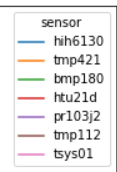

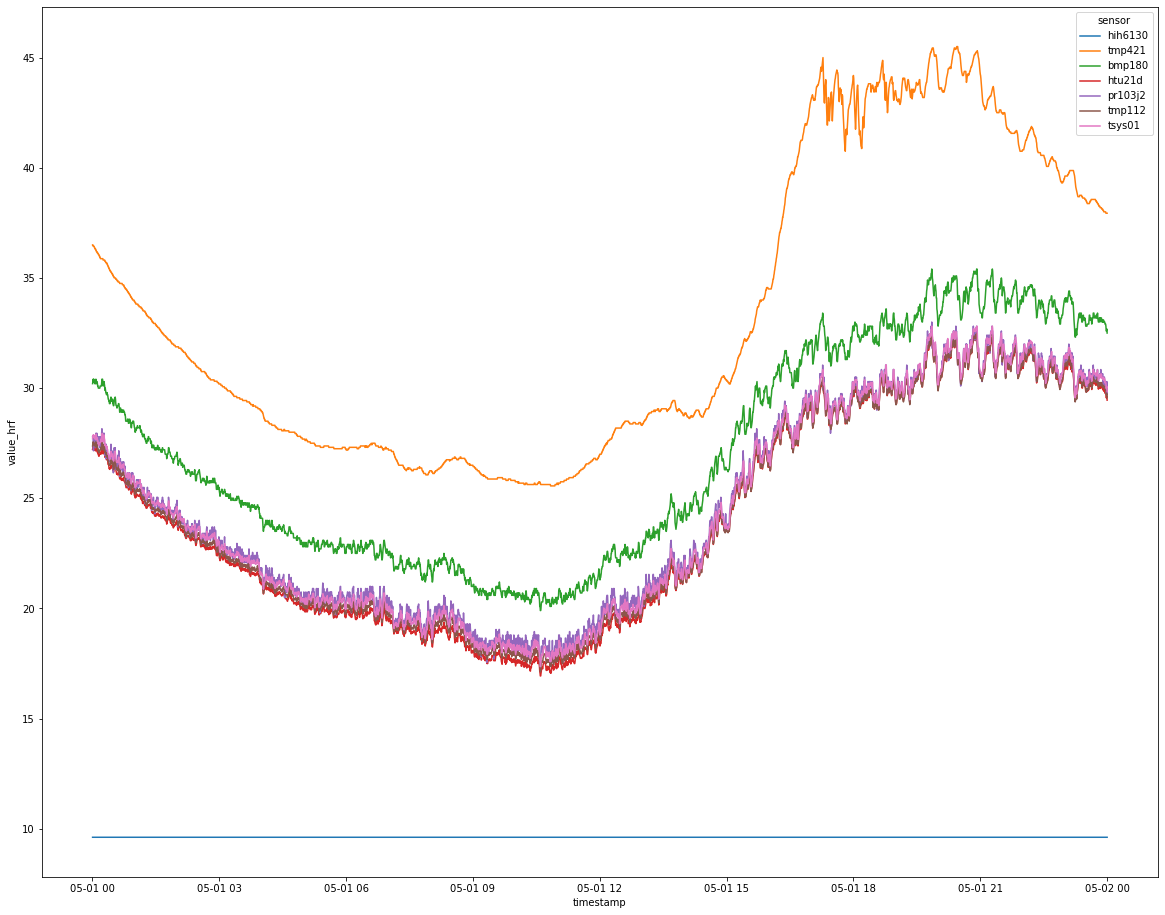

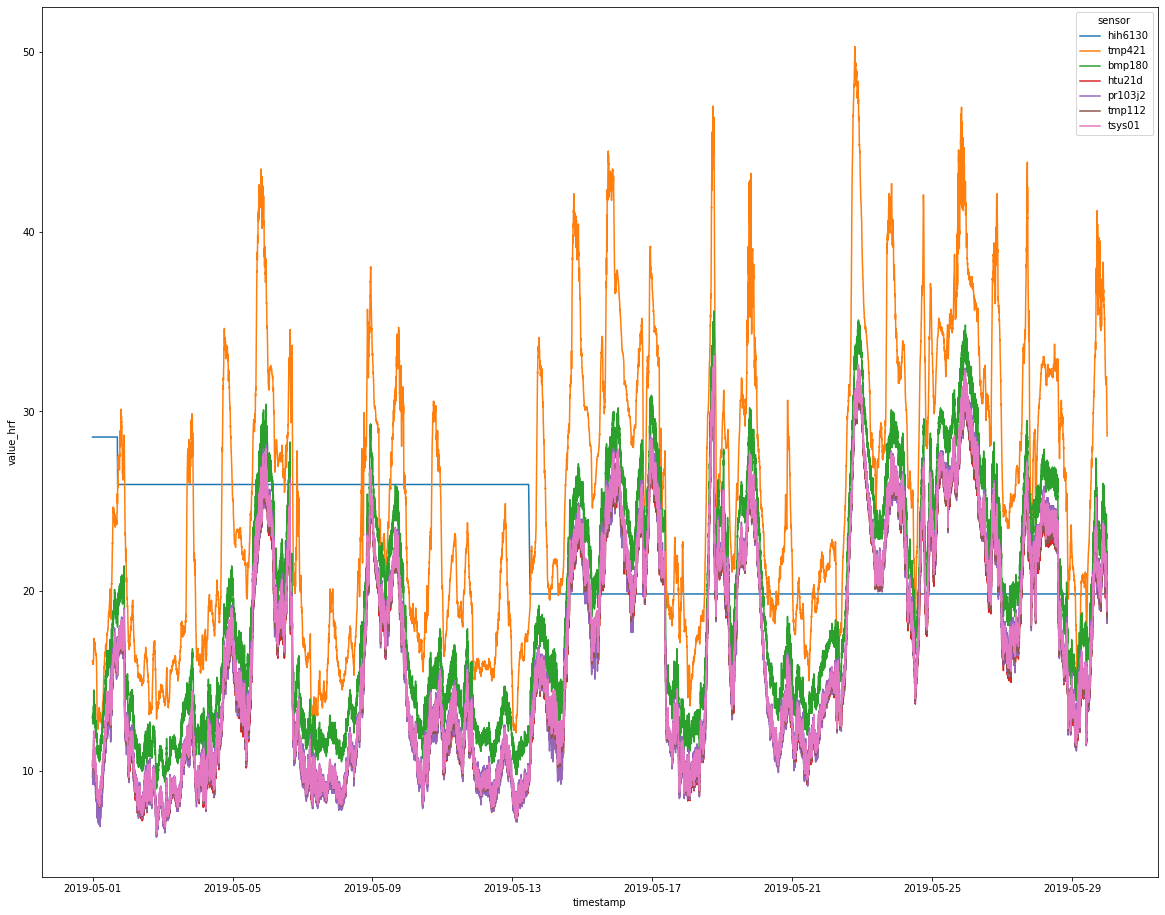

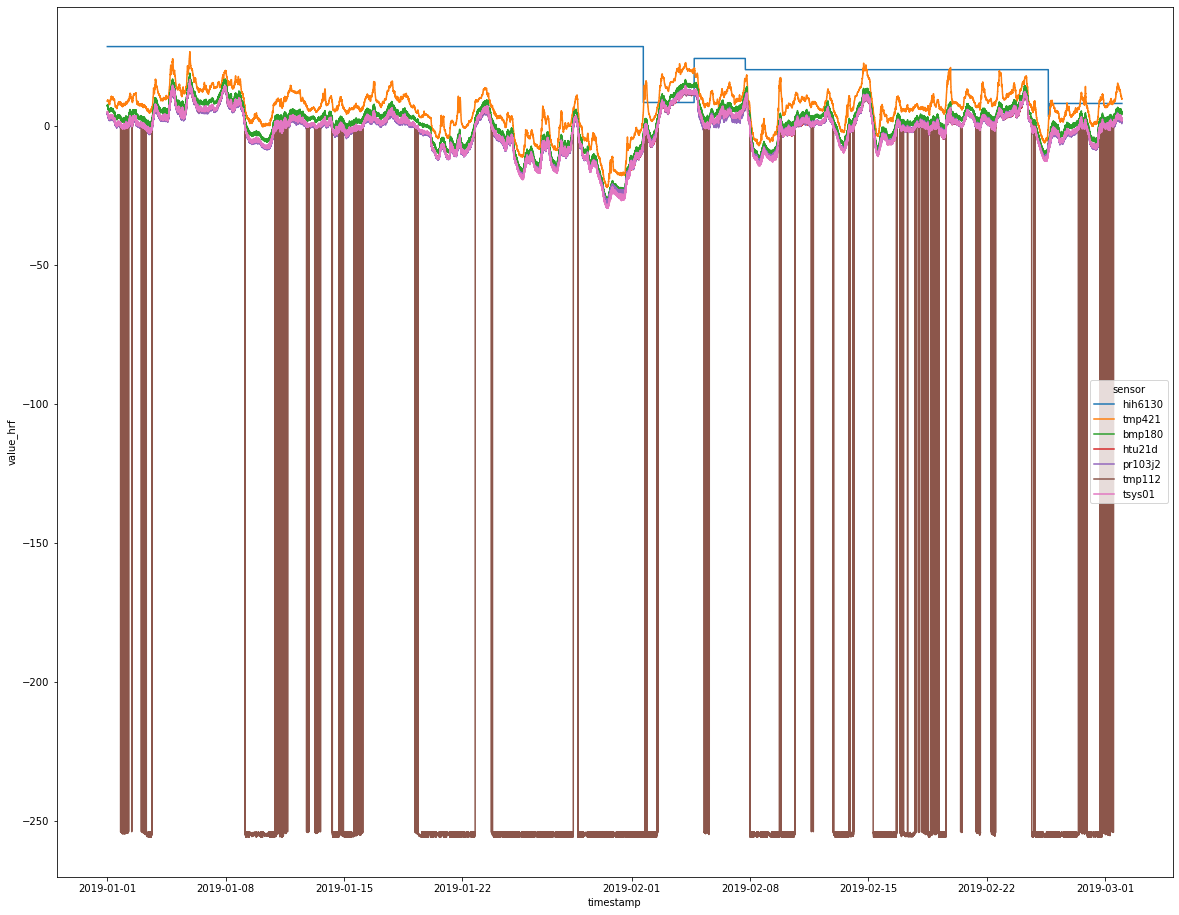

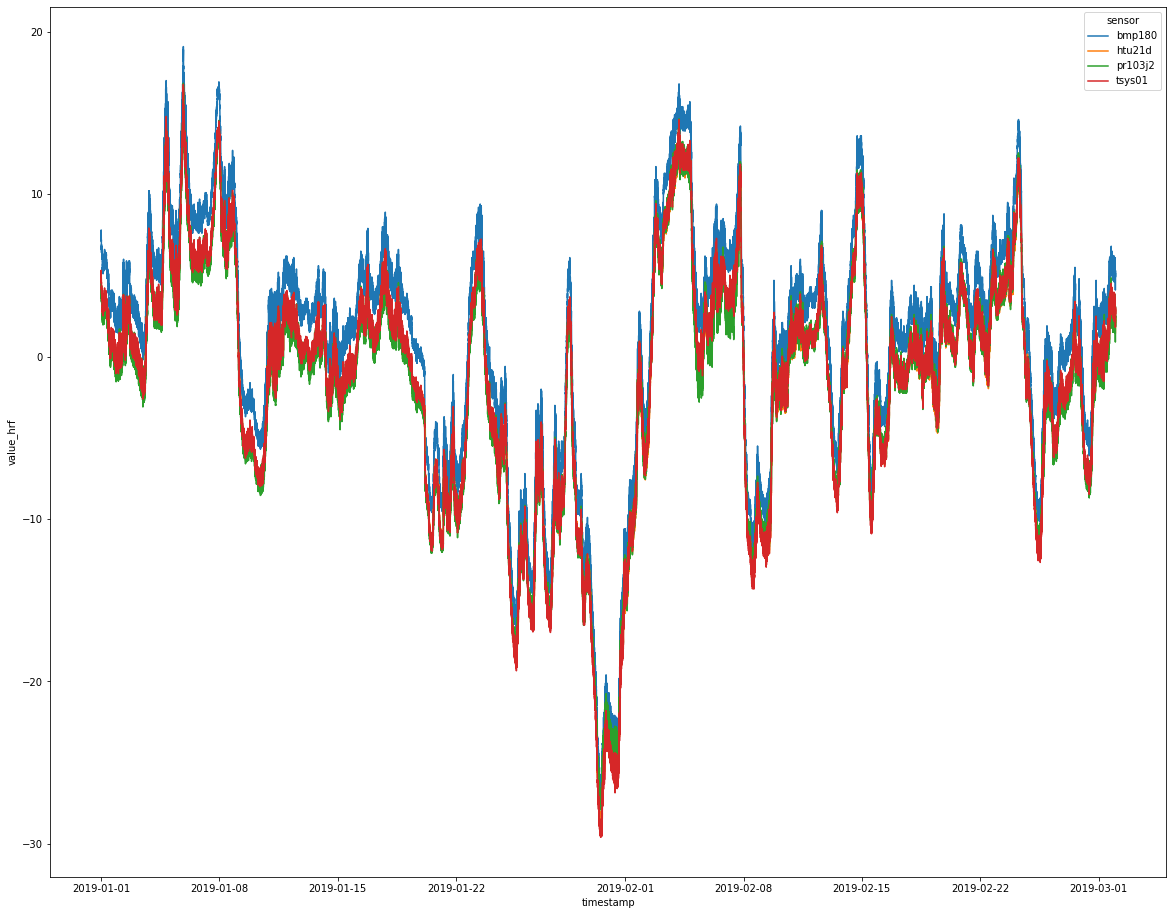

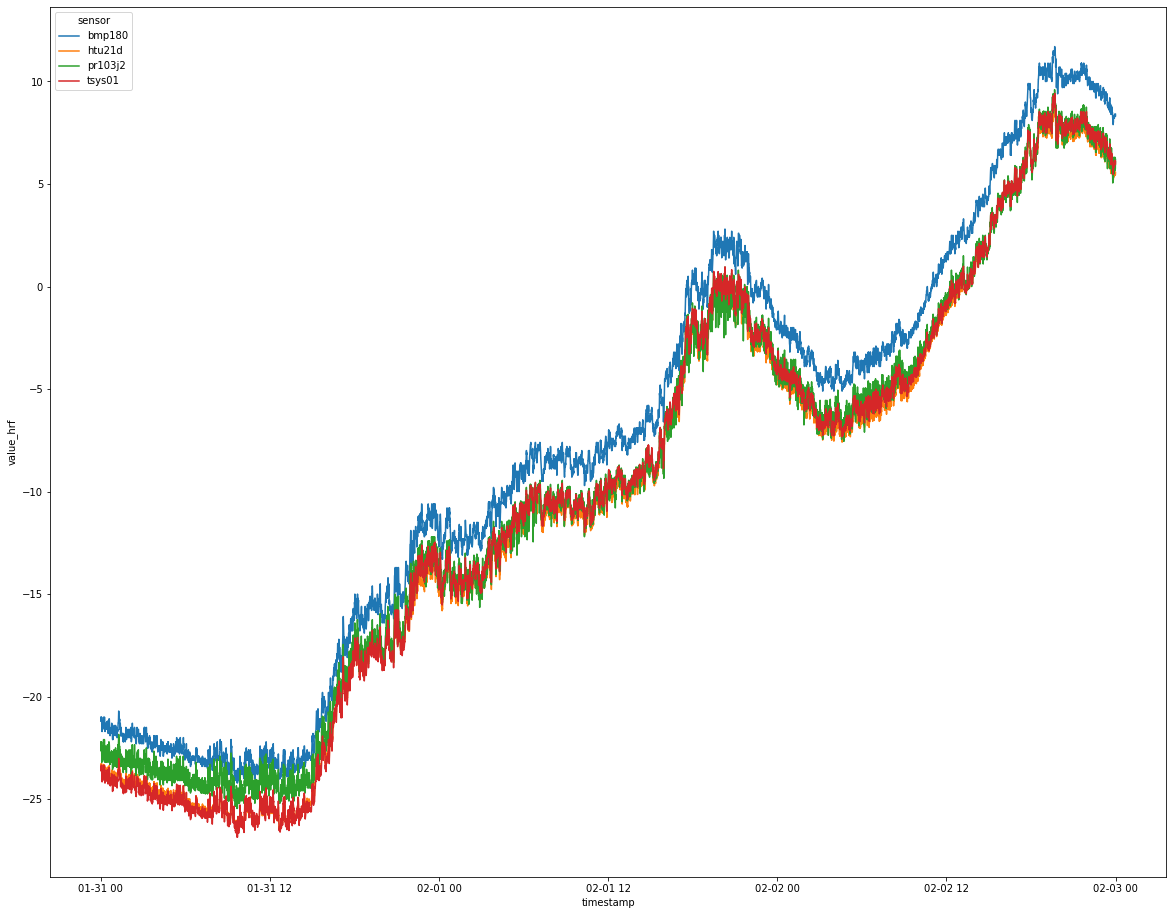

# Examining other sensors:

In [ ]:
minidf.head(10)

In [ ]:
len(minidf)

In [ ]:
len(tdf)

In [ ]:
non_tdf = minidf[minidf.parameter != 'temperature'].copy()

In [ ]:
len(non_tdf)

In [ ]:
for p in non_tdf.parameter.unique(): print(p)

In [ ]:

# non_tdf.head(1000)


In [ ]:

# i dont think we necessariry care too much about acceleration data (although its good to have), but 
# maybe lets focus on 


In [ ]:

hdf = minidf[minidf.parameter == 'humidity'].copy()
hdf.head(10)

# three sep datavalues ! 


In [ ]:

# Sets the figure size temporarily but has to be set again the next plot
plt.figure(figsize=(20,16))
sns.lineplot(x=hdf.index, y="value_hrf", hue="sensor", data=hdf); 
plt.show()


In [ ]:
hdf.dtypes

In [ ]:

hdf = hdf[hdf['sensor'].isin(['hih4030'])]
# Sets the figure size temporarily but has to be set again the next plot
plt.figure(figsize=(20,16))
sns.lineplot(x=hdf.index, y="value_hrf", hue="sensor", data=hdf); 
plt.show()


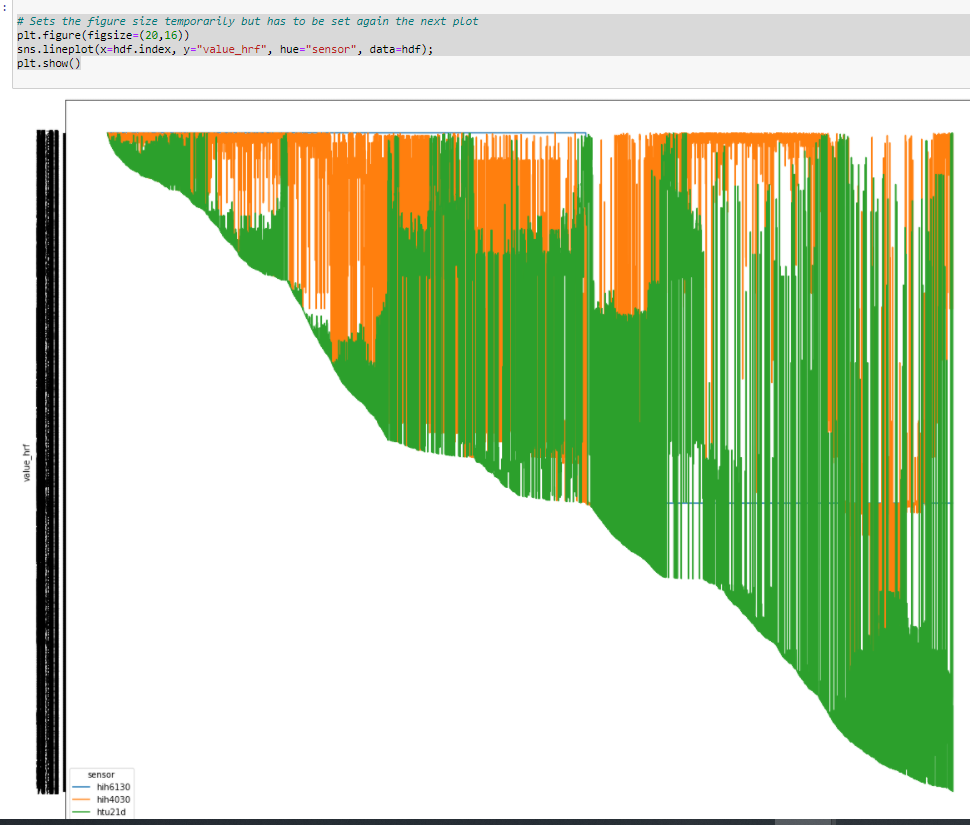

In [ ]:

hdf.value_hrf = hdf.value_hrf.astype(np.float16)
hdf = hdf.loc['2019-02-01 03:00':'2019-02-01 04:00'].copy()
# Sets the figure size temporarily but has to be set again the next plot
plt.figure(figsize=(20,16))
sns.lineplot(x=hdf.index, y="value_hrf", hue="sensor", data=hdf); 
plt.show()



In [ ]:

hdf = minidf[minidf.parameter == 'humidity'].copy()
hdf.value_hrf = hdf.value_hrf.astype(np.float16)

hdf = hdf[hdf['sensor'].isin(['hih4030', 'htu21d'])]

hdf = hdf.loc['2019-02-01':'2019-02-12'].copy()
# Sets the figure size temporarily but has to be set again the next plot
plt.figure(figsize=(20,16))
sns.lineplot(x=hdf.index, y="value_hrf", hue="sensor", data=hdf); 
plt.show()


minidf.head(1)

In [ ]:
minidf.head(10)

In [ ]:

minidf = df.loc['2019-01-01':'2019-06-01'].copy()
hdf = minidf[minidf.parameter == 'humidity'].copy()
hdf.value_hrf = hdf.value_hrf.astype(np.float16)

hdf = hdf[hdf['sensor'].isin(['htu21d'])]
# hdf = hdf.loc['2019-02-01':'2020-02-01'].copy()

# Sets the figure size temporarily but has to be set again the next plot
plt.figure(figsize=(20,16))
sns.lineplot(x=hdf.index, y="value_hrf", hue="sensor", data=hdf); 
plt.show()


In [ ]:

minidf = df.loc['2019-01-01':'2019-06-01'].copy()
hdf = minidf[minidf.parameter == 'humidity'].copy()
hdf.value_hrf = hdf.value_hrf.astype(np.float16)

hdf = hdf[hdf['sensor'].isin(['hih4030'])]
# hdf = hdf.loc['2019-02-01':'2020-02-01'].copy()

# Sets the figure size temporarily but has to be set again the next plot
plt.figure(figsize=(20,16))
sns.lineplot(x=hdf.index, y="value_hrf", hue="sensor", data=hdf); 
plt.show()
